<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/06_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [13]:
folder = "/gdrive/MyDrive/deep_learning_courses/data/"

In [ ]:
!ls "/gdrive/MyDrive/deep_learning_courses/data/"

california_housing_train.csv		   tweets.zip
training.1600000.processed.noemoticon.csv  WasteDataSet.zip


In [14]:
import pandas as pd

In [15]:
df = pd.read_csv(folder + "training.1600000.processed.noemoticon.csv", encoding = "latin", header=None)

In [30]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [31]:
df = df.iloc[:,[0,5]]
df.columns = ["sentiment","tweet"]
df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [32]:
df["sentiment"].value_counts(normalize = True)*100

0    50.0
4    50.0
Name: sentiment, dtype: float64

In [33]:
sents = {
    0: "negatif",
    4:"positif"
}

In [34]:
df["sentiment"] = ["negatif" if val==0 else "positif" for val in df["sentiment"].values]

<ipython-input-34-001dcd771203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = ["negatif" if val==0 else "positif" for val in df["sentiment"].values]


In [35]:
df.head()

,sentiment,tweet
0,negatif,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negatif,is upset that he can't update his Facebook by ...
2,negatif,@Kenichan I dived many times for the ball. Man...
3,negatif,my whole body feels itchy and like its on fire
4,negatif,"@nationwideclass no, it's not behaving at all...."


# Preprocessing

In [17]:
import re

In [18]:
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [21]:
english_stopwords = stopwords.words("english")

In [22]:
len(english_stopwords)

179

In [23]:
stemmer = SnowballStemmer("english")

In [28]:
def preprocess(text):

  # les mentions, les liens et tout ce qui n'est pas alphanumérique
  text_cleaning_regex = "@\S+|https?:?\S+|http?:\S+|[^A-Za-z0-9]"
  text = re.sub(text_cleaning_regex," ",str(text).lower().strip())

  tokens = []
  # les stopwords
  for word in text.split(" "):
    if word not in english_stopwords:
      word_stem = stemmer.stem(word)
      tokens.append(word_stem)

  cleaned_text = " ".join(tokens).strip()

  return cleaned_text

In [25]:
preprocess("Loosing my tensorflow exclusive learning networking")

'loos tensorflow exclus learn network'

In [36]:
df["text"] = df["tweet"].apply(preprocess)

<ipython-input-36-dd349562eed4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["tweet"].apply(preprocess)


In [37]:
df["tweet"][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_data, test_data = train_test_split(df, test_size = .2, stratify=df["sentiment"], random_state = 42)

In [ ]:
len(test_data)

320000

In [38]:
def length(text):
  return len(text.split(" "))

In [39]:
df["len"] = df["text"].apply(length)

<ipython-input-39-bab3c26dd8f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len"] = df["text"].apply(length)


In [40]:
df["len"].describe()

count    1.600000e+06
mean     9.525854e+00
std      5.997685e+00
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      2.270000e+02
Name: len, dtype: float64

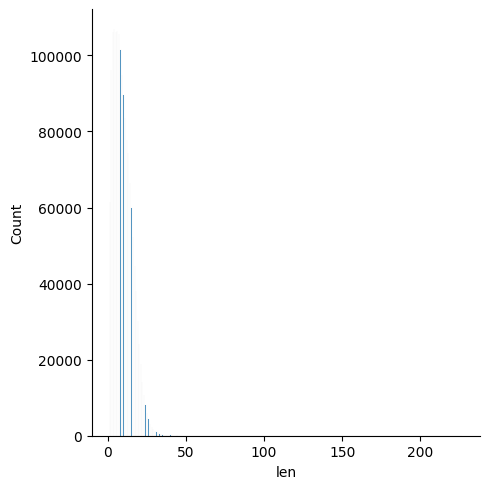

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df["len"])
plt.show()

# Tokenization and text to sequences

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
vocab_size = 70_000
maxlen = 15
tokenizer = Tokenizer(num_words = vocab_size,oov_token="<OOV>")


tokenizer.fit_on_texts(train_data["text"])
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_data["text"])
training_padded = pad_sequences(training_sequences, padding="post",maxlen=maxlen, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_data["text"])
test_padded = pad_sequences(test_sequences, padding="post",maxlen=maxlen, truncating="post")

# Label Encoder

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
encoder = LabelEncoder()

In [73]:
training_labels = encoder.fit_transform(train_data["sentiment"])
test_labels = encoder.transform(test_data["sentiment"])

In [74]:
training_labels = training_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

In [75]:
training_labels.shape

(1280000, 1)

# Modeling

In [66]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding

In [ ]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        # vocab_size pour la taille du vocabulaire
        Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation ="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 2)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          1120000   
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1120145 (4.27 MB)
Trainable params: 1120145 (4.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h = model.fit(training_padded, training_labels, epochs = 50,
              batch_size = 2048,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp,stop])

Epoch 1/50
 14/625 [..............................] - ETA: 33s - loss: 0.6928 - accuracy: 0.5132

KeyboardInterrupt: ignored

# Recurrent Neural Network

In [ ]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        # vocab_size pour la taille du vocabulaire
        Embedding(vocab_size, embedding_dim),
        tf.keras.layers.SimpleRNN(10),
        tf.keras.layers.Dense(8, activation ="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 2)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          1120000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                270       
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1120367 (4.27 MB)
Trainable params: 1120367 (4.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h = model.fit(training_padded, training_labels,
              epochs = 50,
              batch_size = 2048,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp,stop])

Epoch 1/50
625/625 [==============================] - 24s 35ms/step - loss: 0.5046 - accuracy: 0.7527 - val_loss: 0.4720 - val_accuracy: 0.7741
Epoch 2/50
  3/625 [..............................] - ETA: 21s - loss: 0.4521 - accuracy: 0.7873

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 27s 44ms/step - loss: 0.4527 - accuracy: 0.7853 - val_loss: 0.4691 - val_accuracy: 0.7759
Epoch 3/50
625/625 [==============================] - 23s 36ms/step - loss: 0.4373 - accuracy: 0.7934 - val_loss: 0.4730 - val_accuracy: 0.7748
Epoch 4/50
625/625 [==============================] - 24s 39ms/step - loss: 0.4249 - accuracy: 0.7996 - val_loss: 0.4818 - val_accuracy: 0.7725


# Prediction

In [ ]:
import numpy as np

In [ ]:
input_sequence_10 = tokenizer.texts_to_sequences(train_data["text"][10])
padded_input_sequence_10 = pad_sequences(input_sequence_10, maxlen=maxlen)

In [ ]:
prediction = model.predict(padded_input_sequence_10)

1/1 [==============================] - 0s 29ms/step


In [ ]:
prediction[0]

array([0.5439996], dtype=float32)

In [ ]:
predicted_label = encoder.inverse_transform([np.argmax(prediction[0])])
predicted_label

array(['negatif'], dtype=object)

In [ ]:
train_data["tweet"][10]

"spring break in plain city... it's snowing "

# LSTM (Long Short Term Memory)

In [ ]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        # vocab_size pour la taille du vocabulaire
        Embedding(vocab_size, embedding_dim),
        # Ajout du caractère bidirectionnel pour permettre de lire une phrase
        # jusqu'à la fin avant d'en deviner le sens
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
        tf.keras.layers.Dense(8, activation ="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 6)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
h = model.fit(training_padded, training_labels,
              epochs = 50,
              batch_size = 2048,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp,stop])

Epoch 1/50
625/625 [==============================] - 123s 178ms/step - loss: 0.4980 - accuracy: 0.7562 - val_loss: 0.4678 - val_accuracy: 0.7768
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 135s 216ms/step - loss: 0.4524 - accuracy: 0.7857 - val_loss: 0.4641 - val_accuracy: 0.7786
Epoch 3/50
625/625 [==============================] - 110s 176ms/step - loss: 0.4386 - accuracy: 0.7923 - val_loss: 0.4652 - val_accuracy: 0.7790
Epoch 4/50
625/625 [==============================] - 106s 170ms/step - loss: 0.4280 - accuracy: 0.7972 - val_loss: 0.4730 - val_accuracy: 0.7786
Epoch 5/50
625/625 [==============================] - 105s 168ms/step - loss: 0.4191 - accuracy: 0.8015 - val_loss: 0.4743 - val_accuracy: 0.7776
Epoch 6/50
625/625 [==============================] - 105s 168ms/step - loss: 0.4107 - accuracy: 0.8056 - val_loss: 0.4834 - val_accuracy: 0.7769
Epoch 7/50
625/625 [==============================] - 103s 164ms/step - loss: 0.4028 - accuracy: 0.8096 - val_loss: 0.4934 - val_accuracy: 0.7746
Epoch 8/50
625/625 [==============================] - 104s 166ms/step - loss: 0.3953 - accuracy: 0.8129 - val_loss: 0.5039 - val_accura

# Transfert Learning

In [1]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
folder = "/gdrive/MyDrive/deep_learning_courses/data/"

In [3]:
glove_file = folder + "glove.twitter.27B.50d.txt"

In [ ]:
glove_file

'/gdrive/MyDrive/deep_learning_courses/data/glove.twitter.27B.50d.txt'

In [4]:
glove_embeddings = {}

In [6]:
import numpy as np

In [7]:
with open(glove_file) as f:
  for line in f:
    values = line.split(" ")
    word = values[0]
    vector = np.asarray(values[1:], dtype="float32")
    glove_embeddings[word] = vector

In [11]:
len(glove_embeddings)

1193515

In [48]:
words = word_index.keys()

In [52]:
i = 0
for word in words:
  if glove_embeddings.get(word) is not None:
    i+=1
print(i)

78156


In [54]:
embedding_matrix = np.zeros((vocab_size, 50))

In [56]:
embedding_matrix.shape

(70000, 50)

In [59]:
for word, i in word_index.items():
  if i>vocab_size-1:
    break
  embedding_vector = glove_embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [64]:
embedding_matrix[3]

array([-0.18131   ,  0.52524   , -0.28472   , -0.60807002, -0.1596    ,
       -0.40669   ,  0.93185002, -0.17254999,  0.083443  ,  0.59878999,
       -0.1533    ,  0.31518   , -5.88910007, -0.49228001, -0.083893  ,
       -0.27406001, -0.67229003, -0.52894998, -1.01499999, -0.11108   ,
       -0.24348   ,  0.18808   ,  0.28635001,  0.25216001, -0.31075001,
        0.49630001,  0.32157999,  0.41881001, -0.14997999, -0.17727999,
        0.044197  ,  0.35543001, -0.35036999,  0.35078001,  0.39432999,
        0.29139   ,  0.067043  ,  0.045019  , -0.2852    ,  0.78556001,
       -0.75101   ,  0.1684    ,  0.32573   , -0.077665  ,  1.03830004,
       -0.94889998,  0.34351   , -0.30759999, -0.42807001,  0.68215001])

In [69]:
embedding_dim = 50
model = tf.keras.models.Sequential(
    [
        # vocab_size pour la taille du vocabulaire
        Embedding(vocab_size, embedding_dim, weights = [embedding_matrix], trainable = False),
        # Ajout du caractère bidirectionnel pour permettre de lire une phrase
        # jusqu'à la fin avant d'en deviner le sens
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
        tf.keras.layers.Dense(8, activation ="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 6)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
h = model.fit(training_padded, training_labels,
              epochs = 50,
              batch_size = 2048,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp,stop])

Epoch 1/50
625/625 [==============================] - 117s 176ms/step - loss: 0.5564 - accuracy: 0.7100 - val_loss: 0.5199 - val_accuracy: 0.7381
Epoch 2/50
  1/625 [..............................] - ETA: 1:09 - loss: 0.5013 - accuracy: 0.7593

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 99s 158ms/step - loss: 0.5119 - accuracy: 0.7438 - val_loss: 0.5065 - val_accuracy: 0.7486
Epoch 3/50
625/625 [==============================] - 96s 153ms/step - loss: 0.5030 - accuracy: 0.7501 - val_loss: 0.5005 - val_accuracy: 0.7529
Epoch 4/50
625/625 [==============================] - 96s 154ms/step - loss: 0.4983 - accuracy: 0.7536 - val_loss: 0.5000 - val_accuracy: 0.7531
Epoch 5/50
625/625 [==============================] - 93s 149ms/step - loss: 0.4947 - accuracy: 0.7564 - val_loss: 0.4941 - val_accuracy: 0.7577
Epoch 6/50
625/625 [==============================] - 92s 147ms/step - loss: 0.4920 - accuracy: 0.7583 - val_loss: 0.4920 - val_accuracy: 0.7590
Epoch 7/50
625/625 [==============================] - 96s 154ms/step - loss: 0.4899 - accuracy: 0.7596 - val_loss: 0.4898 - val_accuracy: 0.7605
Epoch 8/50
625/625 [==============================] - 93s 149ms/step - loss: 0.4880 - accuracy: 0.7611 - val_loss: 0.4887 - val_accuracy: 0.7